In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract

In [2]:
img_cv  = cv2.imread('./Selected/034.jpeg')
cv2.imshow('Business Card',img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#read image as object
img_pl = PIL.Image.open('./Selected/034.jpeg')

In [4]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

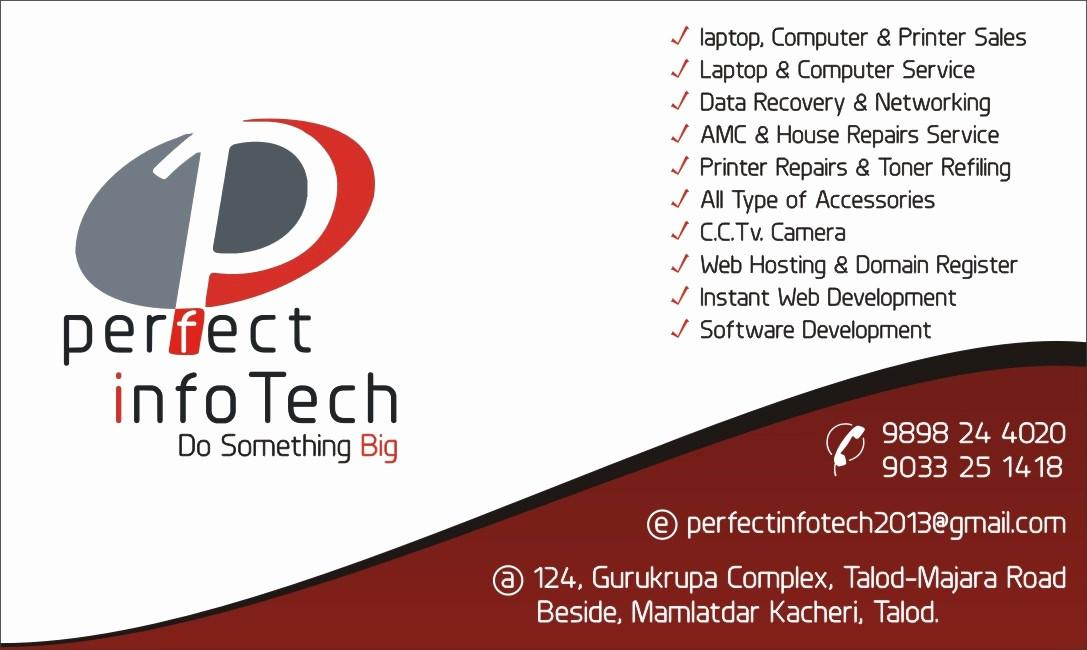

In [5]:
img_pl

In [6]:
type(img_cv)

numpy.ndarray

 ### Text from Image

 ### Methodde 1

In [7]:
text_cv = pytesseract.image_to_string(img_cv)

In [8]:
print(text_cv)

J laptop, Computer & Printer Sales
J/ Laptop & Computer Service

J Data Recovery & Networking

/ AMC & House Repairs Service
J Printer Repairs & Toner Refiling
J All Type of Accessories

J CCTv. Camera

J Web Hosting & Domain Register
J Instant Web Development

J/ Software Development

infoTech

Do Something Big (ZB 9898 24 4020

9033 25 1418
© perfectinfotech2013@gmail.com

@ 124, Gurukrupa Complex, Talod-Majara Road
Beside, Mamlatdar Kacheri, Talod.




 ### Methodde 2

In [9]:
text_pl = pytesseract.image_to_string(img_pl)

In [10]:
print(text_pl)

J laptop, Computer & Printer Sales
J Laptop & Computer Service

/ Data Recovery & Networking

/ AMC & House Repairs Service
J Printer Repairs & Toner Refiling
J All Type of Accessories

/ CCTv. Camera

J/ Web Hosting & Domain Register
J Instant Web Development

/ Software Development

infoTech

Do Something Big Ve) 9898 24 4020

9033 25 1418
© perfectinfotech2013@gmail.com

@ 124, Gurukrupa Complex, Talod-Majara Road
Beside, Mamlatdar Kacheri, Talod.




### Image To Data

In [11]:
data = pytesseract.image_to_data(img_cv)

In [12]:
# extract data with pytesseract from image
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(dataList[1:],columns=dataList[0]) 

In [13]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1087,650,-1,
1,2,1,1,0,0,0,0,0,1087,1,-1,
2,3,1,1,1,0,0,0,0,1087,1,-1,
3,4,1,1,1,1,0,0,0,1087,1,-1,
4,5,1,1,1,1,1,0,0,1087,1,95.000000,
5,2,1,2,0,0,0,671,26,355,317,-1,
6,3,1,2,1,0,0,671,26,355,57,-1,
7,4,1,2,1,1,0,671,26,355,25,-1,
8,5,1,2,1,1,1,671,26,18,18,90.201263,J
9,5,1,2,1,1,2,701,28,62,23,95.805878,"laptop,"


In [14]:
#drop missing value and rows
df.dropna(inplace=True)
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
#change data type to integer
df['conf'] = pd.to_numeric(df['conf'], errors='coerce').astype(int)
df[col_int] = df[col_int].astype(int)

In [15]:
df.dtypes

level         int64
page_num      int64
block_num     int64
par_num       int64
line_num      int64
word_num      int64
left          int64
top           int64
width         int64
height        int64
conf          int64
text         object
dtype: object

In [16]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
            
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
    
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
            
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            #for show text on the rectangle
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
        else:
            continue
            
cv2.imshow("bounding box",image)
cv2.waitKey()
cv2.destroyAllWindows()